Import the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

Load your dataset:

In [6]:
data = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0)

Prepare your data:

Forecast future values:
    
    To forecast the next time periods, you can use the .forecast() method.

In [31]:
direccion = './dataset/Datos_TODO_reducido.csv'
data = pd.read_csv(direccion, header=0)
# -1 en ambos para 26, -5 en ambos para 22!
data_train = data.iloc[:-1]
data_test = data.iloc[-1:]

#Año_22_yVAR = np.zeros(2450)
#Año_23_yVAR = np.zeros(2450)
#Año_24_yVAR = np.zeros(2450)
#Año_25_yVAR = np.zeros(2450)
Año_26_yVAR = np.zeros(2450)


model = sm.tsa.VAR(data_train)

# Fit the model.
lag_order = 10
results = model.fit(lag_order)

# Make predictions.
forecast_values = results.forecast(data_train.values, steps=1)

#Año_22_yVAR = forecast_values[0] # -5
#Año_23_yVAR = forecast_values[0] # -4
#Año_24_yVAR = forecast_values[0] # -3
#Año_25_yVAR = forecast_values[0] # -2
Año_26_yVAR = forecast_values[0] # -1

In [32]:
Y_VAR = pd.DataFrame({'Año_22': Año_22_yVAR.reshape(-1), \
                        'Año_23': Año_23_yVAR.reshape(-1), \
                        'Año_24': Año_24_yVAR.reshape(-1), \
                        'Año_25': Año_25_yVAR.reshape(-1), \
                        'Año_26': Año_26_yVAR.reshape(-1)})

Y_VAR.to_csv('./Y_VAR.csv', index=None)

### CARGA Y VISUALIZACIÓN

In [39]:
# Cargar las bases de datos
import pandas as pd
import numpy as np

from utils.math_utils import *
from data_loader.data_utilsTFM import *

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

# Carga de datos!!


Año_24_x, Año_25_x, Año_26_x = np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1))
Año_22_y, Año_23_y, Año_24_y, Año_25_y, Año_26_y = np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1))
Año_22_y_Inter_1, Año_23_y_Inter_1, Año_24_y_Inter_1, Año_25_y_Inter_1, Año_26_y_Inter_1 = np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1))

mean, iqr = 0, 0

rango = 5 # 6
for x in range(1, rango+1):
    # For 1 years  NO INTERPOLATION
    aux = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_normales_MSE/{x}/Y_guardado_26_R.csv').values
    Año_22_y += aux[0].reshape((2450, 1))
    Año_23_y += aux[1].reshape((2450, 1))
    Año_24_y += aux[2].reshape((2450, 1))
    Año_25_y += aux[3].reshape((2450, 1))
    Año_26_y += aux[4].reshape((2450, 1))
    
    # For 1 year  Scaler to seeee
    aux = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/{x}/Y_guardado_26_R.csv').values
    Año_22_y_Inter_1 += aux[0].reshape((2450, 1))
    Año_23_y_Inter_1 += aux[1].reshape((2450, 1))
    Año_24_y_Inter_1 += aux[2].reshape((2450, 1))
    Año_25_y_Inter_1 += aux[3].reshape((2450, 1))
    Año_26_y_Inter_1 += aux[4].reshape((2450, 1))
    
    

aux = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0).values    
Año_24_x += aux[-3].reshape((2450, 1))
Año_25_x += aux[-2].reshape((2450, 1))
Año_26_x += aux[-1].reshape((2450, 1))


#
Año_22_y = Año_22_y/rango
Año_23_y = Año_23_y/rango
Año_24_y = Año_24_y/rango
Año_25_y = Año_25_y/rango
Año_26_y = Año_26_y/rango


#El mejor!!
Año_22_y_Inter_1 = Año_22_y_Inter_1/rango
Año_23_y_Inter_1 = Año_23_y_Inter_1/rango
Año_24_y_Inter_1 = Año_24_y_Inter_1/rango
Año_25_y_Inter_1 = Año_25_y_Inter_1/rango
Año_26_y_Inter_1 = Año_26_y_Inter_1/rango

mean = mean/rango
iqr = iqr/rango


Y_VAR = pd.read_csv('./Y_VAR.csv')
Año_22_yVAR = Y_VAR["Año_22"].values.reshape((2450, 1))
Año_23_yVAR = Y_VAR["Año_23"].values.reshape((2450, 1))
Año_24_yVAR = Y_VAR["Año_24"].values.reshape((2450, 1))
Año_25_yVAR = Y_VAR["Año_25"].values.reshape((2450, 1))
Año_26_yVAR = Y_VAR["Año_26"].values.reshape((2450, 1))

Y_ARIMA = pd.read_csv('./Y_ARIMA.csv')
Año_22_yARIMA = Y_ARIMA["Año_22"].values.reshape((2450, 1))
Año_23_yARIMA = Y_ARIMA["Año_23"].values.reshape((2450, 1))
Año_24_yARIMA = Y_ARIMA["Año_24"].values.reshape((2450, 1))
Año_25_yARIMA = Y_ARIMA["Año_25"].values.reshape((2450, 1))
Año_26_yARIMA = Y_ARIMA["Año_26"].values.reshape((2450, 1))

In [ ]:
def AbsPerError():

C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


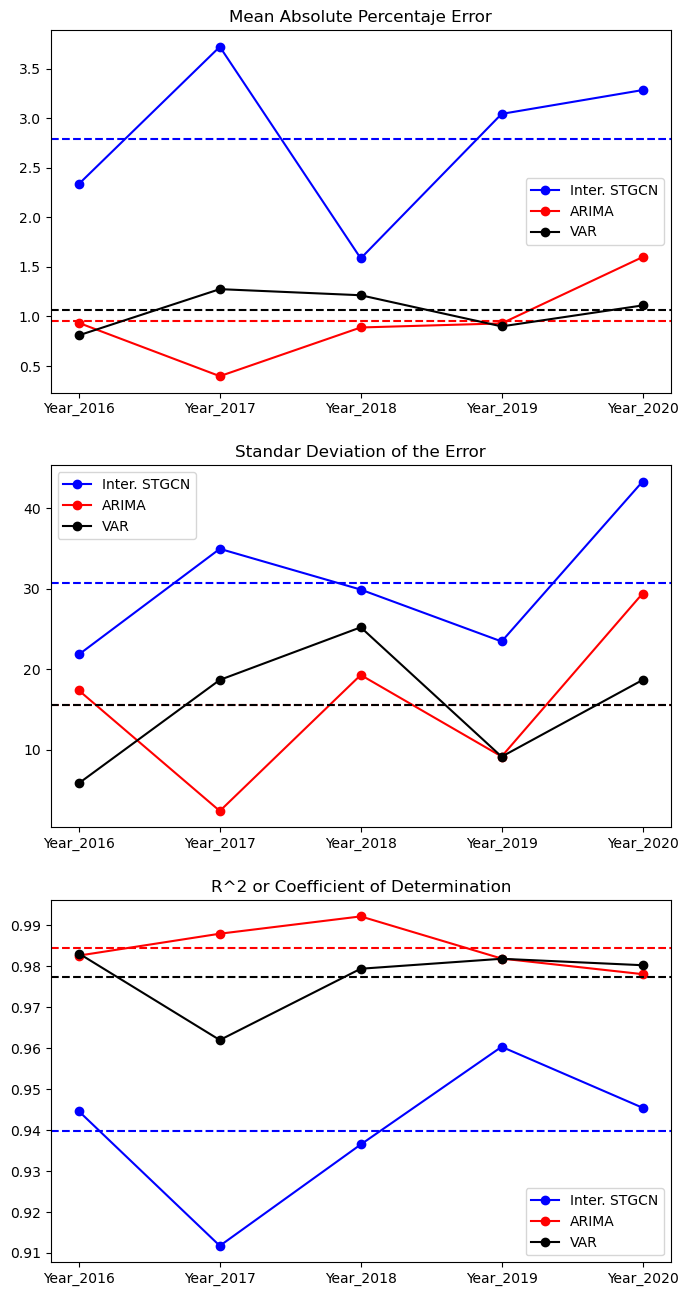

In [56]:
# Coger los datos originales
Año_22_x, Año_23_x, Año_24_x, Año_25_x, Año_26_x = np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1))
datos = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0).values    
Año_22_x += datos[-5].reshape((2450, 1))
Año_23_x += datos[-4].reshape((2450, 1))
Año_24_x += datos[-3].reshape((2450, 1))
Año_25_x += datos[-2].reshape((2450, 1))
Año_26_x += datos[-1].reshape((2450, 1))


# Lista de paises a examinar
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
#data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2_Sin_0.csv', header=0)

colums = data.columns
    
paises_buenos, paises_malos = [], []



lista_negra = ["SDN", "NGA", "IRN", "NOR"]
for column in colums:
    pais_origen, pais_destino = column.split("-")
    if pais_origen not in lista_negra and pais_destino not in lista_negra:
        paises_buenos.append(column)

lista_blanca = ["SDN"]
for column in colums:
    pais_origen, pais_destino = column.split("-")
    if pais_origen in lista_blanca or pais_destino in lista_blanca:
        paises_malos.append(column)

# Lista negra:
#paises = [data.columns.get_loc(col) for col in paises_buenos if col in data.columns]
# Lista blanca:
#paises = [data.columns.get_loc(col) for col in paises_malos]
#print(Año_22_x[paises].mean())
# Usar todos los paises:
paises = [aux for aux, _ in enumerate(data.columns)]

#####################################################################
'''
NewY = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Y_guardado_26.csv').values
#Si, el evaluador mape funciona!!!

Y_STGCN_Inter = pd.DataFrame({'Año_2016': NewY[0], \
                              'Año_2017': Año_23_y_Inter_1[paises].reshape(-1),  \
                              'Year_2018': Año_24_y_Inter_1[paises].reshape(-1), \
                              'Year_2019': Año_25_y_Inter_1[paises].reshape(-1), \
                              'Year_2020': Año_26_y_Inter_1[paises].reshape(-1)})

NewY = pd.read_csv('./Y_guardado_26.csv', header=0)
'''
# mean = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Aux.csv').values[0][0]
# iqr  = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Aux.csv').values[1][0]
#####################################################################


X = pd.DataFrame({'Year_2016': Año_22_x[paises].reshape(-1), \
                  'Year_2017': Año_23_x[paises].reshape(-1), \
                  'Year_2018': Año_24_x[paises].reshape(-1), \
                  'Year_2019': Año_25_x[paises].reshape(-1), \
                  'Year_2020': Año_26_x[paises].reshape(-1)})


Y_VAR = pd.DataFrame({'Year_2016': Año_22_yVAR[paises].reshape(-1), \
                        'Year_2017': Año_23_yVAR[paises].reshape(-1), \
                        'Year_2018': Año_24_yVAR[paises].reshape(-1), \
                        'Year_2019': Año_25_yVAR[paises].reshape(-1), \
                        'Year_2020': Año_26_yVAR[paises].reshape(-1)})


'''
Y_STGCN = pd.DataFrame({'Year_2016': Año_22_y[paises].reshape(-1), \
                        'Year_2017': Año_23_y[paises].reshape(-1), \
                        'Year_2018': Año_24_y[paises].reshape(-1), \
                        'Year_2019': Año_25_y[paises].reshape(-1), \
                        'Year_2020': Año_26_y[paises].reshape(-1)})
                        '''
Y_STGCN = pd.DataFrame({'Year_2016': Año_22_yARIMA[paises].reshape(-1), \
                        'Year_2017': Año_23_yARIMA[paises].reshape(-1), \
                        'Year_2018': Año_24_yARIMA[paises].reshape(-1), \
                        'Year_2019': Año_25_yARIMA[paises].reshape(-1), \
                        'Year_2020': Año_26_yARIMA[paises].reshape(-1)})


Y_STGCN_Inter = pd.DataFrame({'Year_2016': Año_22_y_Inter_1[paises].reshape(-1), \
                              'Year_2017': Año_23_y_Inter_1[paises].reshape(-1), \
                              'Year_2018': Año_24_y_Inter_1[paises].reshape(-1), \
                              'Year_2019': Año_25_y_Inter_1[paises].reshape(-1), \
                              'Year_2020': Año_26_y_Inter_1[paises].reshape(-1)})

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16))


columns = []
MAPE_STGCN_Inter, MAPE_VAR, MAPE_STGCN = [], [], []
dispersion_STGCN_Inter, dispersion_VAR, dispersion_STGCN = [], [], []
Std_STGCN_Inter, Std_VAR, Std_STGCN = [], [], []
R2_STGCN_Inter, R2_VAR, R2_STGCN = [], [], []

escalado = False
escalador = "robust_original"
number = 1
for (column, values_X), (_, values_STGCN_Inter), (_, values_VAR), (_, values_STGCN) \
    in zip(X.iteritems(), Y_STGCN_Inter.iteritems(), Y_VAR.iteritems(), Y_STGCN.iteritems()):
    
    # Escalado
    if escalado:
        mean = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/{number}/Aux.csv').values[0][0]
        iqr  = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/{number}/Aux.csv').values[1][0]

        
        values_X = scale(values_X, mean, iqr, escalador)
        values_STGCN_Inter = scale(values_STGCN_Inter, mean, iqr, escalador)
        values_STGCN = scale(values_STGCN, mean, iqr, escalador)
        values_VAR = scale(values_VAR, mean, iqr, escalador)

    
    alpha = 0.6 #0.6
    results = values_VAR*alpha + values_STGCN_Inter*(1-alpha)
    #results = results*0 + 1000000
    condition = values_VAR > 1e4
    results[condition] = values_VAR[condition]
    # Activar o desactivar la mezcla!!
    #values_STGCN = results
    
    
    # Error Absoluto Porcentual
    APE_STGCN_Inter = (abs((values_STGCN_Inter - values_X)/(values_X))).replace(np.inf, 0)
    APE_STGCN = (abs((values_STGCN - values_X)/(values_X))).replace(np.inf, 0)
    APE_VAR = (abs((values_VAR - values_X)/(values_X))).replace(np.inf, 0)
        # Error Absoluto Porcentual MEDIO
    MAPE_STGCN_Inter.append(np.mean(APE_STGCN_Inter))
    MAPE_STGCN.append(np.mean(APE_STGCN))
    MAPE_VAR.append(np.mean(APE_VAR))
        # DESVIACIÓN TIPICA DEL Error Absoluto Porcentual
    dispersion_STGCN_Inter.append((np.std(APE_STGCN_Inter)))
    dispersion_STGCN.append((np.std(APE_STGCN)))
    dispersion_VAR.append((np.std(APE_VAR)))
    
    # R^2
    R2_STGCN_Inter.append(r2_score(values_X, values_STGCN_Inter))
    R2_STGCN.append(r2_score(values_X, values_STGCN))
    R2_VAR.append(r2_score(values_X, values_VAR))

    columns.append(column)
    number += 1

data_std = {
    'Year': [2016, 2017, 2018, 2019, 2020, "mean"],
    'std-VAR': [dispersion_VAR[0], dispersion_VAR[1], dispersion_VAR[2], dispersion_VAR[3], dispersion_VAR[4], np.mean(Std_VAR)],
    'mean-VAR': [MAPE_VAR[0], MAPE_VAR[1], MAPE_VAR[2], MAPE_VAR[3], MAPE_VAR[4], np.mean(MAPE_VAR)],
    'std-STGCN': [dispersion_STGCN_Inter[0], dispersion_STGCN_Inter[1], dispersion_STGCN_Inter[2], dispersion_STGCN_Inter[3], dispersion_STGCN_Inter[4], np.mean(Std_STGCN)],
    'mean-STGCN': [MAPE_STGCN_Inter[0], MAPE_STGCN_Inter[1], MAPE_STGCN_Inter[2], MAPE_STGCN_Inter[3], MAPE_STGCN_Inter[4], np.mean(MAPE_STGCN_Inter)]
}
df_std = pd.DataFrame(data_std)


ax1.set_title('Mean Absolute Percentaje Error')
ax1.plot(columns, MAPE_STGCN_Inter, marker='o', linestyle='-', color='blue', label="Inter. STGCN") # a un año
ax1.axhline(np.mean(MAPE_STGCN_Inter), linestyle='--', color='blue')
ax1.plot(columns, MAPE_STGCN, marker='o', linestyle='-', color='red', label="ARIMA") # a un año
ax1.axhline(np.mean(MAPE_STGCN), linestyle='--', color='red')
ax1.plot(columns, MAPE_VAR, marker='o', linestyle='-', color='black', label="VAR") # a un año
ax1.axhline(np.mean(MAPE_VAR), linestyle='--', color='black')


ax2.set_title('Standar Deviation of the Error')
ax2.plot(columns, dispersion_STGCN_Inter, marker='o', linestyle='-', color='blue', label="Inter. STGCN") # a un año
ax2.axhline(np.mean(dispersion_STGCN_Inter), linestyle='--', color='blue')
ax2.plot(columns, dispersion_STGCN, marker='o', linestyle='-', color='red', label="ARIMA") # a un año
ax2.axhline(np.mean(dispersion_STGCN), linestyle='--', color='red')
ax2.plot(columns, dispersion_VAR, marker='o', linestyle='-', color='black', label="VAR") # a un año
ax2.axhline(np.mean(dispersion_VAR), linestyle='--', color='black')


ax3.set_title('R^2 or Coefficient of Determination')
ax3.plot(columns, R2_STGCN_Inter, marker='o', linestyle='-', color='blue', label="Inter. STGCN") # a un año
ax3.axhline(np.mean(R2_STGCN_Inter), linestyle='--', color='blue')
ax3.plot(columns, R2_STGCN, marker='o', linestyle='-', color='red', label="ARIMA") # a un año
ax3.axhline(np.mean(R2_STGCN), linestyle='--', color='red')
ax3.plot(columns, R2_VAR, marker='o', linestyle='-', color='black', label="VAR") # a un año
ax3.axhline(np.mean(R2_VAR), linestyle='--', color='black')
'''
print("MAPE")
print(MAPE_VAR, np.mean(MAPE_VAR))
print(MAPE_STGCN, np.mean(MAPE_STGCN))
print(MAPE_STGCN_Inter, np.mean(MAPE_STGCN_Inter))

print("Dispersion")
print(dispersion_VAR, np.mean(dispersion_VAR))
print(dispersion_STGCN, np.mean(dispersion_STGCN))
print(dispersion_STGCN_Inter, np.mean(dispersion_STGCN_Inter))

print("R2")
print(R2_VAR, np.mean(R2_VAR))
print(R2_STGCN, np.mean(R2_STGCN))
print(R2_STGCN_Inter, np.mean(R2_STGCN_Inter))
'''

ax1.legend()
ax2.legend()
ax3.legend()

In [45]:
dispersion_VAR

[5.845017293344548,
 18.688120439067983,
 25.229037025665072,
 9.142376421632076,
 18.674718676693868]